In [1]:
# Cell 1: Imports
import sys
from pathlib import Path

# Add project root to path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from loguru import logger

# Configure plotting
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

# Import project modules
from src.data.data_loader import DataLoader, load_sample_data
from src.utils.helpers import setup_logging

setup_logging(log_level="INFO")

print("Imports completed successfully!")

Imports completed successfully!


In [2]:
# Cell 2: Load Data
# Load the data
data_loader = DataLoader()

# Try to load from file, fall back to sample data
try:
    df = data_loader.load_csv()
except FileNotFoundError:
    print("Data file not found, using sample data")
    df = load_sample_data()

print(f"Dataset Shape: {df.shape}")
print(f"Number of Features: {df.shape[1]}")
print(f"Number of Records: {df.shape[0]}")

2025-11-27 14:57:00 | INFO     | config_loader:__init__:47 - Configuration loaded from D:\practice-1\src\config\config.yaml
2025-11-27 14:57:00 | INFO     | data_loader:__init__:62 - DataLoader initialized
2025-11-27 14:57:00 | INFO     | data_loader:load_sample_data:333 - Created sample data with 10 rows


Data file not found, using sample data
Dataset Shape: (10, 11)
Number of Features: 11
Number of Records: 10


In [3]:
# Cell 3: First Look at Data
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,2014,450000,145000,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2016,650000,85000,Petrol,Dealer,Manual,Second Owner,18.2 kmpl,1497 CC,117 bhp,5.0
2,2018,850000,45000,Petrol,Individual,Automatic,First Owner,16.5 kmpl,1998 CC,188 bhp,5.0
3,2017,720000,67000,Diesel,Dealer,Manual,First Owner,21.0 kmpl,1493 CC,108 bhp,5.0
4,2015,380000,120000,Petrol,Individual,Manual,Second Owner,19.5 kmpl,1197 CC,81 bhp,5.0


In [4]:
# Cell 4: Data Types and Info
# Check data types
print("\nData Types:")
print(df.dtypes)

print("\n" + "="*50)
print("Dataset Info:")
df.info()


Data Types:
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)     object
engine                 object
max_power              object
seats                 float64
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                10 non-null     int64  
 1   selling_price       10 non-null     int64  
 2   km_driven           10 non-null     int64  
 3   fuel                10 non-null     object 
 4   seller_type         10 non-null     object 
 5   transmission        10 non-null     object 
 6   owner               10 non-null     object 
 7   mileage(km/ltr/kg)  10 non-null     object 
 8   engine              10 non-null

In [5]:
# Cell 5: Basic Statistics
# Numerical statistics
print("Numerical Features Statistics:")
df.describe()

Numerical Features Statistics:


,year,selling_price,km_driven,seats
count,10.00000,1.000000e+01,10.000000,10.000000
mean,2016.50000,8.090000e+05,84000.000000,5.200000
std,3.02765,5.314644e+05,60477.727764,0.632456
min,2012.00000,2.500000e+05,8000.000000,5.000000
25%,2014.25000,3.975000e+05,33750.000000,5.000000
50%,2016.50000,6.850000e+05,76000.000000,5.000000
75%,2018.75000,1.112500e+06,138750.000000,5.000000
max,2021.00000,1.800000e+06,175000.000000,7.000000


In [6]:
# Cell 6: Categorical Statistics
# Categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\nCategorical Columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


Categorical Columns: ['fuel', 'seller_type', 'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power']

fuel value counts:
fuel
Diesel    5
Petrol    5
Name: count, dtype: int64

seller_type value counts:
seller_type
Individual    5
Dealer        5
Name: count, dtype: int64

transmission value counts:
transmission
Manual       6
Automatic    4
Name: count, dtype: int64

owner value counts:
owner
First Owner     6
Second Owner    3
Third Owner     1
Name: count, dtype: int64

mileage(km/ltr/kg) value counts:
mileage(km/ltr/kg)
23.4 kmpl    1
18.2 kmpl    1
16.5 kmpl    1
21.0 kmpl    1
19.5 kmpl    1
22.8 kmpl    1
17.0 kmpl    1
24.1 kmpl    1
15.2 kmpl    1
20.5 kmpl    1
Name: count, dtype: int64

engine value counts:
engine
1248 CC    1
1497 CC    1
1998 CC    1
1493 CC    1
1197 CC    1
1956 CC    1
2487 CC    1
1396 CC    1
2998 CC    1
1461 CC    1
Name: count, dtype: int64

max_power value counts:
max_power
74 bhp     1
117 bhp    1
188 bhp    1
108 bhp    1
81 bhp 

No missing values found!


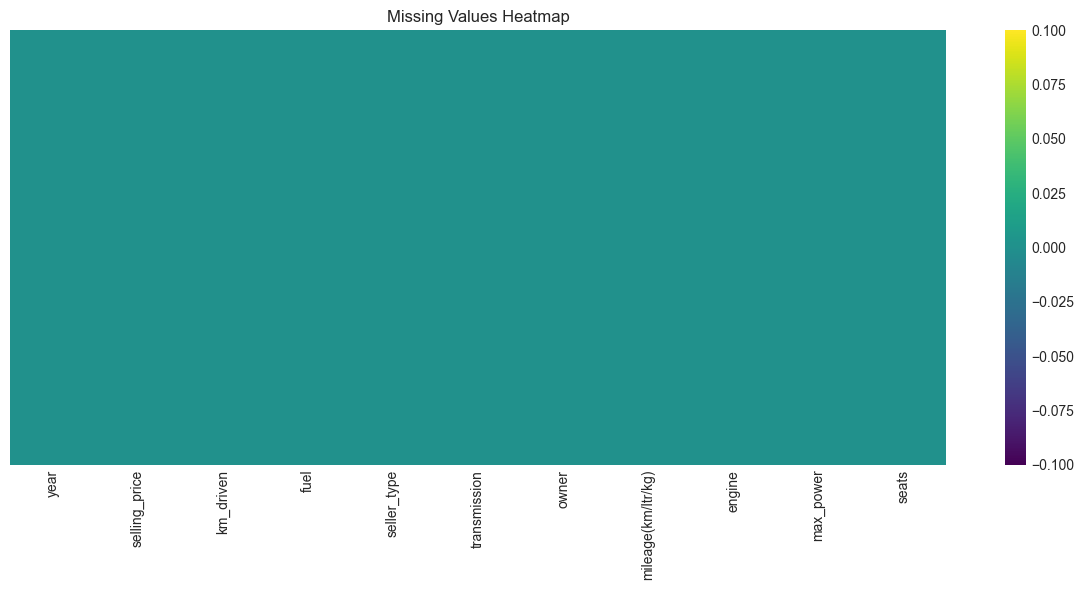

In [7]:
# Cell 7: Missing Values Analysis
# Check for missing values
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum().values,
    'Missing Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(
    'Missing Percentage', ascending=False
)

if len(missing_df) > 0:
    print("Missing Values:")
    print(missing_df)
else:
    print("No missing values found!")

# Cell 8: Visualize Missing Values
# Visualize missing values
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

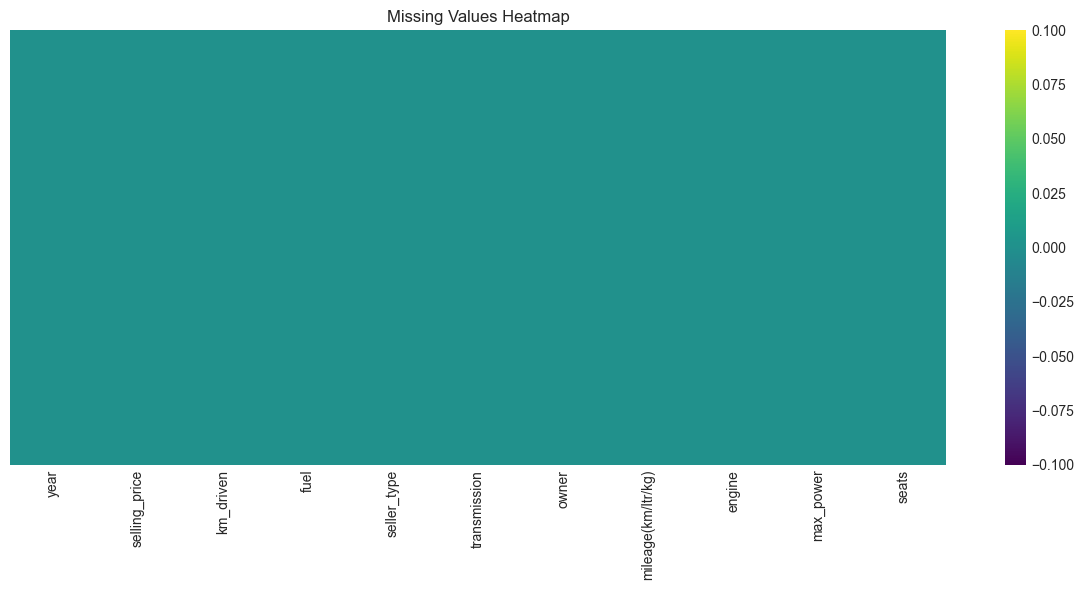

In [8]:
# Cell 8: Visualize Missing Values
# Visualize missing values
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

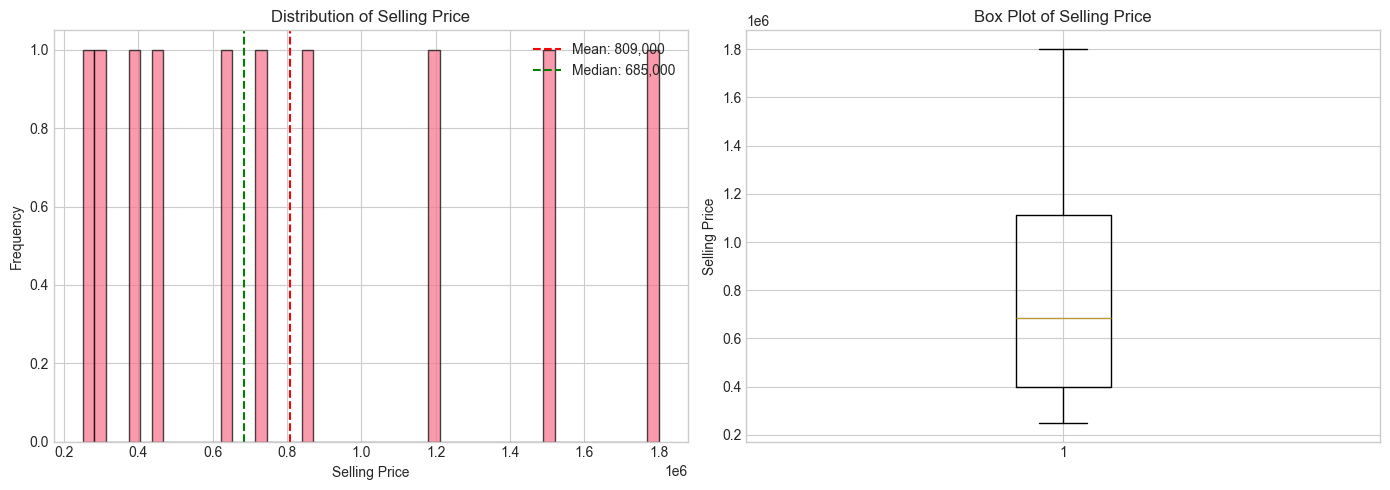


Selling Price Statistics:
Mean: 809,000.00
Median: 685,000.00
Std: 531,464.43
Min: 250,000.00
Max: 1,800,000.00


In [9]:
# Cell 9: Target Variable Distribution
# Distribution of selling price
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['selling_price'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Selling Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Selling Price')
axes[0].axvline(df['selling_price'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["selling_price"].mean():,.0f}')
axes[0].axvline(df['selling_price'].median(), color='green', linestyle='--',
                label=f'Median: {df["selling_price"].median():,.0f}')
axes[0].legend()

# Box plot
axes[1].boxplot(df['selling_price'])
axes[1].set_ylabel('Selling Price')
axes[1].set_title('Box Plot of Selling Price')

plt.tight_layout()
plt.show()

print(f"\nSelling Price Statistics:")
print(f"Mean: {df['selling_price'].mean():,.2f}")
print(f"Median: {df['selling_price'].median():,.2f}")
print(f"Std: {df['selling_price'].std():,.2f}")
print(f"Min: {df['selling_price'].min():,.2f}")
print(f"Max: {df['selling_price'].max():,.2f}")

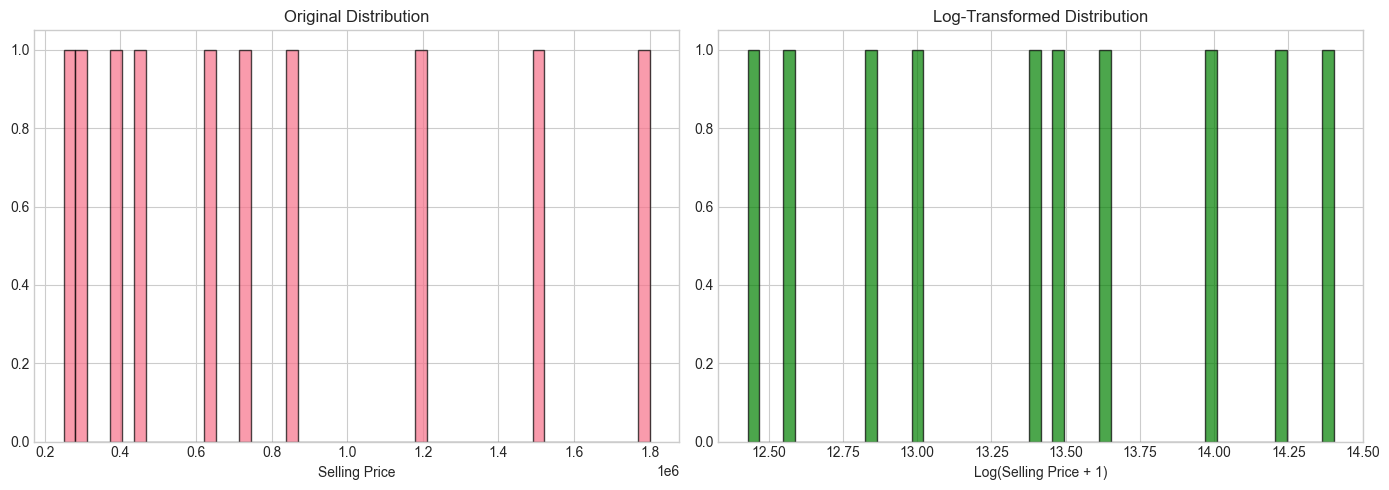

In [10]:
# Cell 10: Log Transform Target
# Log transform of selling price
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['selling_price'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Original Distribution')
axes[0].set_xlabel('Selling Price')

axes[1].hist(np.log1p(df['selling_price']), bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].set_title('Log-Transformed Distribution')
axes[1].set_xlabel('Log(Selling Price + 1)')

plt.tight_layout()
plt.show()

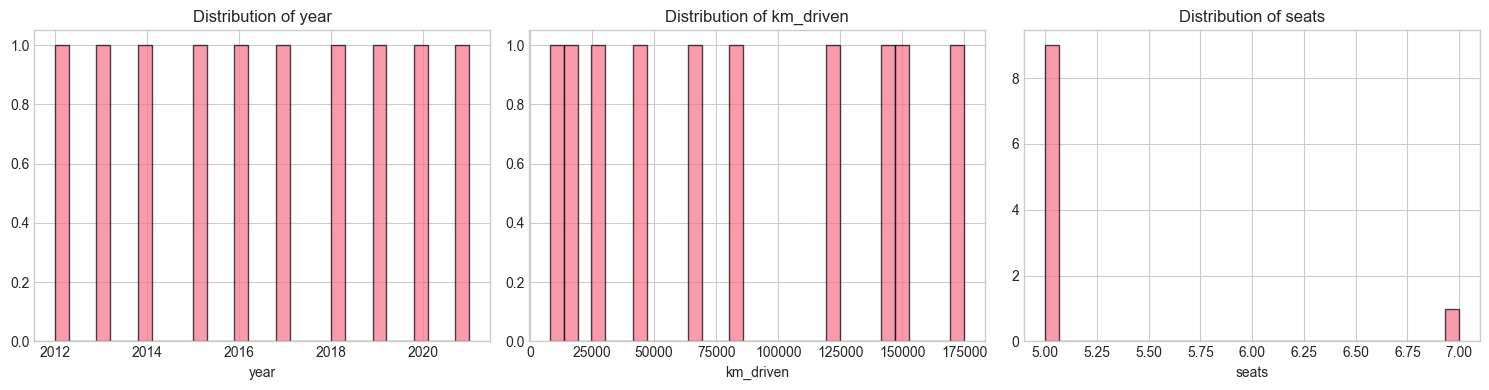

In [11]:
# Cell 11: Numerical Features Distribution
# Distribution of numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'selling_price']

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

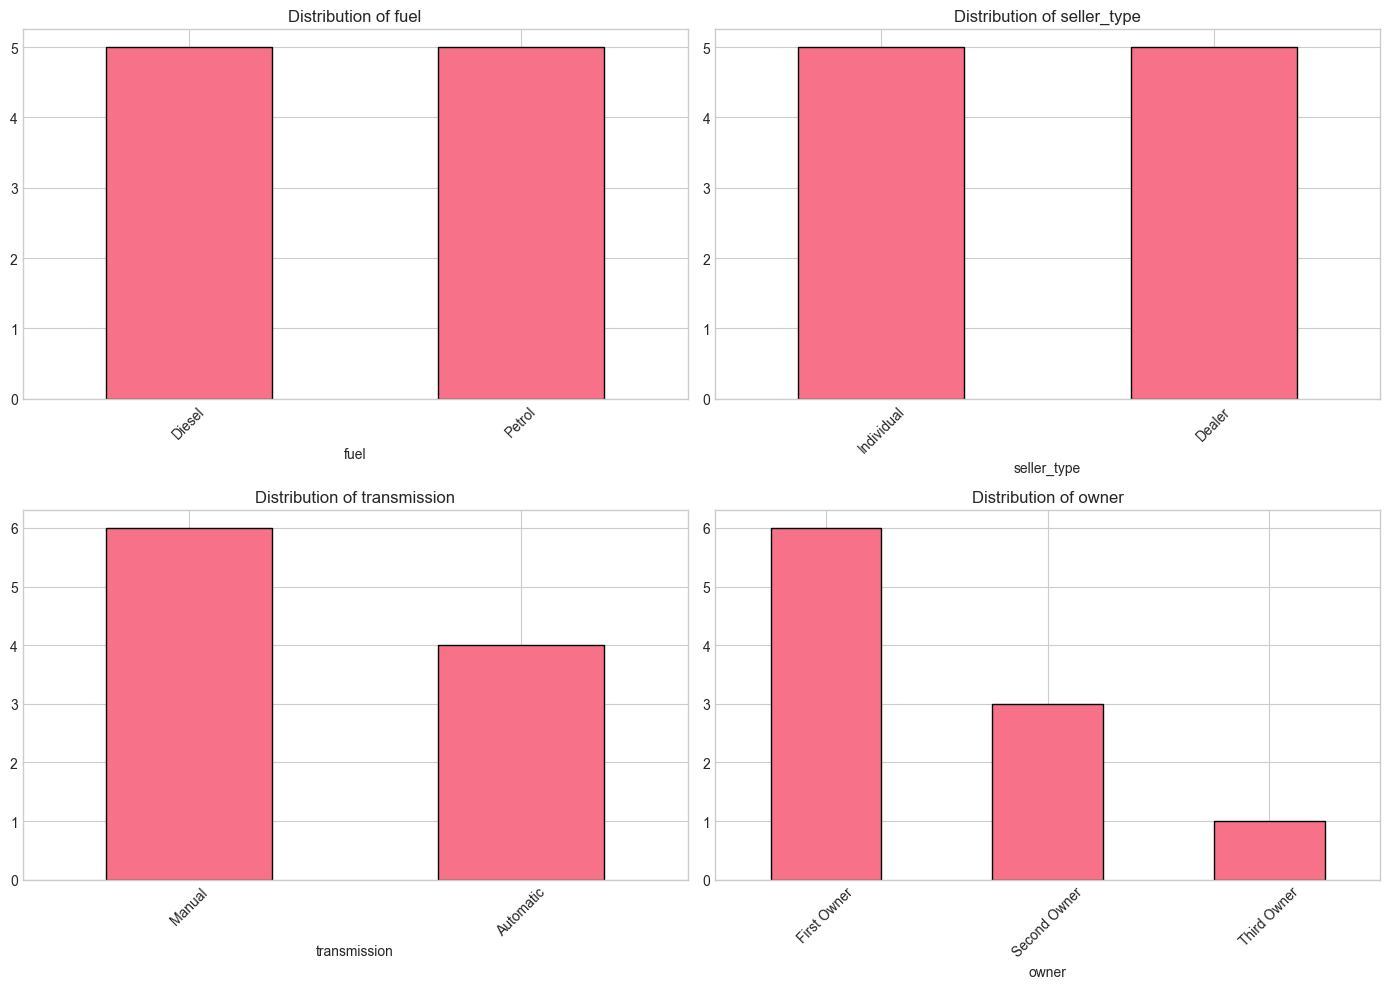

In [12]:
# Cell 12: Categorical Features Distribution
# Distribution of categorical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols[:4]):
    df[col].value_counts().plot(kind='bar', ax=axes[idx], edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

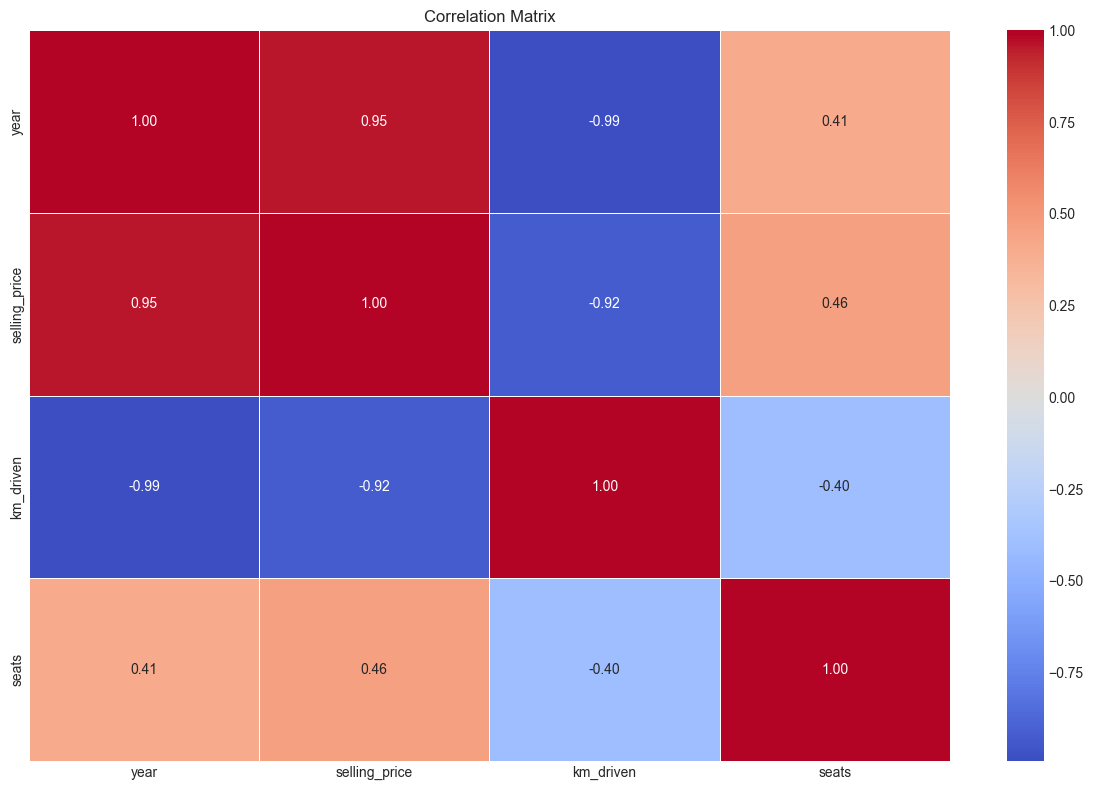

In [13]:
# Cell 13: Correlation Analysis
# Correlation matrix
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

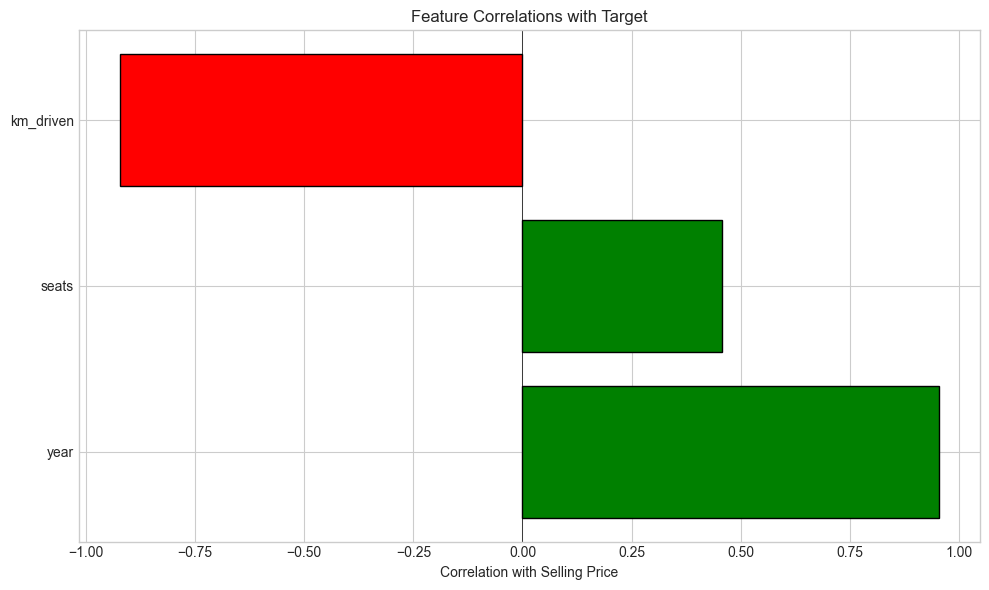


Correlations with Selling Price:
year         0.954647
seats        0.456837
km_driven   -0.922372
Name: selling_price, dtype: float64


In [14]:
# Cell 14: Target Correlations
# Correlations with target
target_corr = correlation_matrix['selling_price'].drop('selling_price').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in target_corr.values]
plt.barh(target_corr.index, target_corr.values, color=colors, edgecolor='black')
plt.xlabel('Correlation with Selling Price')
plt.title('Feature Correlations with Target')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

print("\nCorrelations with Selling Price:")
print(target_corr)

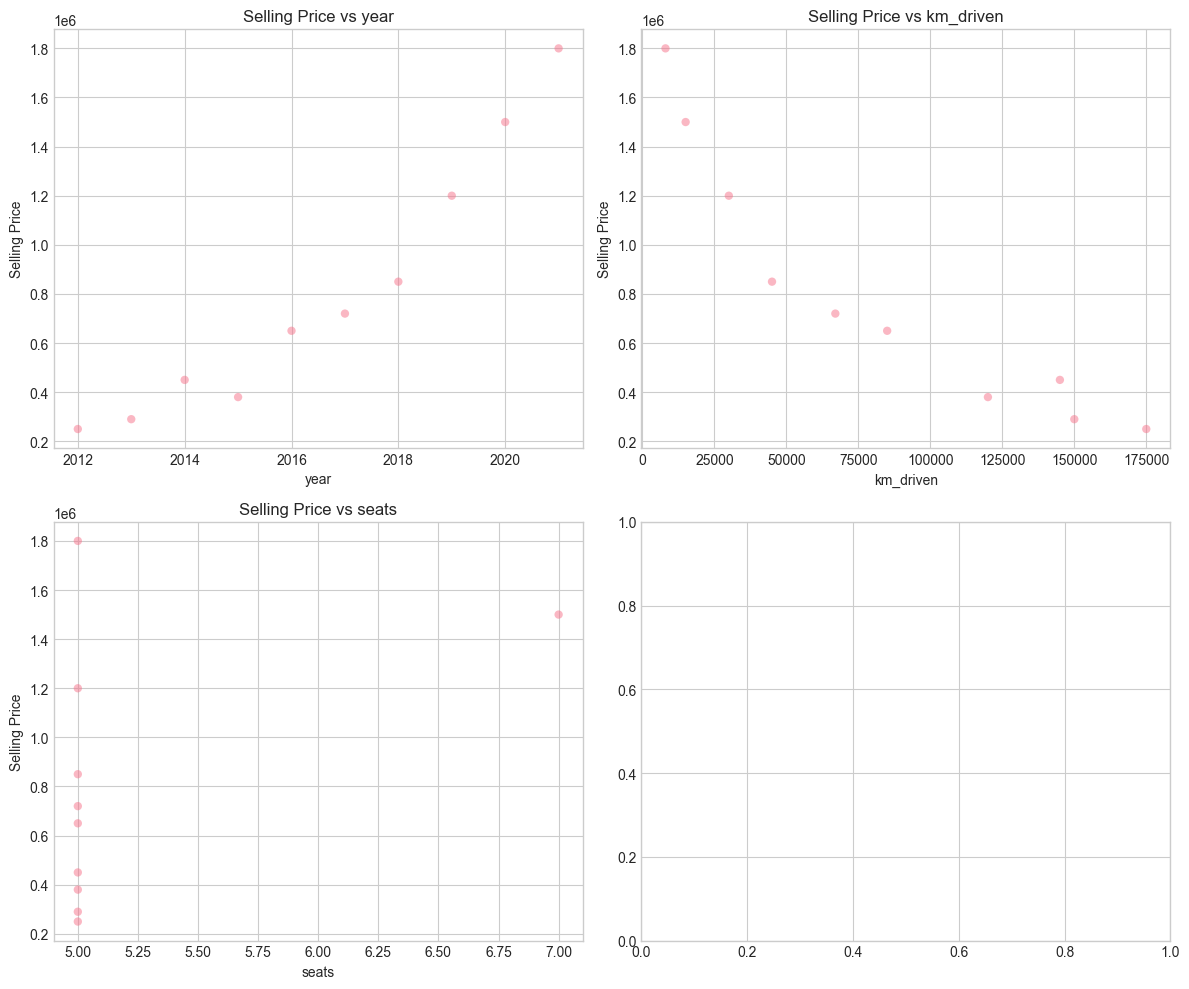

In [15]:
# Cell 15: Scatter Plots
# Scatter plots of top correlated features
top_features = target_corr.abs().sort_values(ascending=False).head(4).index.tolist()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, col in enumerate(top_features):
    axes[idx].scatter(df[col], df['selling_price'], alpha=0.5, edgecolors='none')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Selling Price')
    axes[idx].set_title(f'Selling Price vs {col}')

plt.tight_layout()
plt.show()

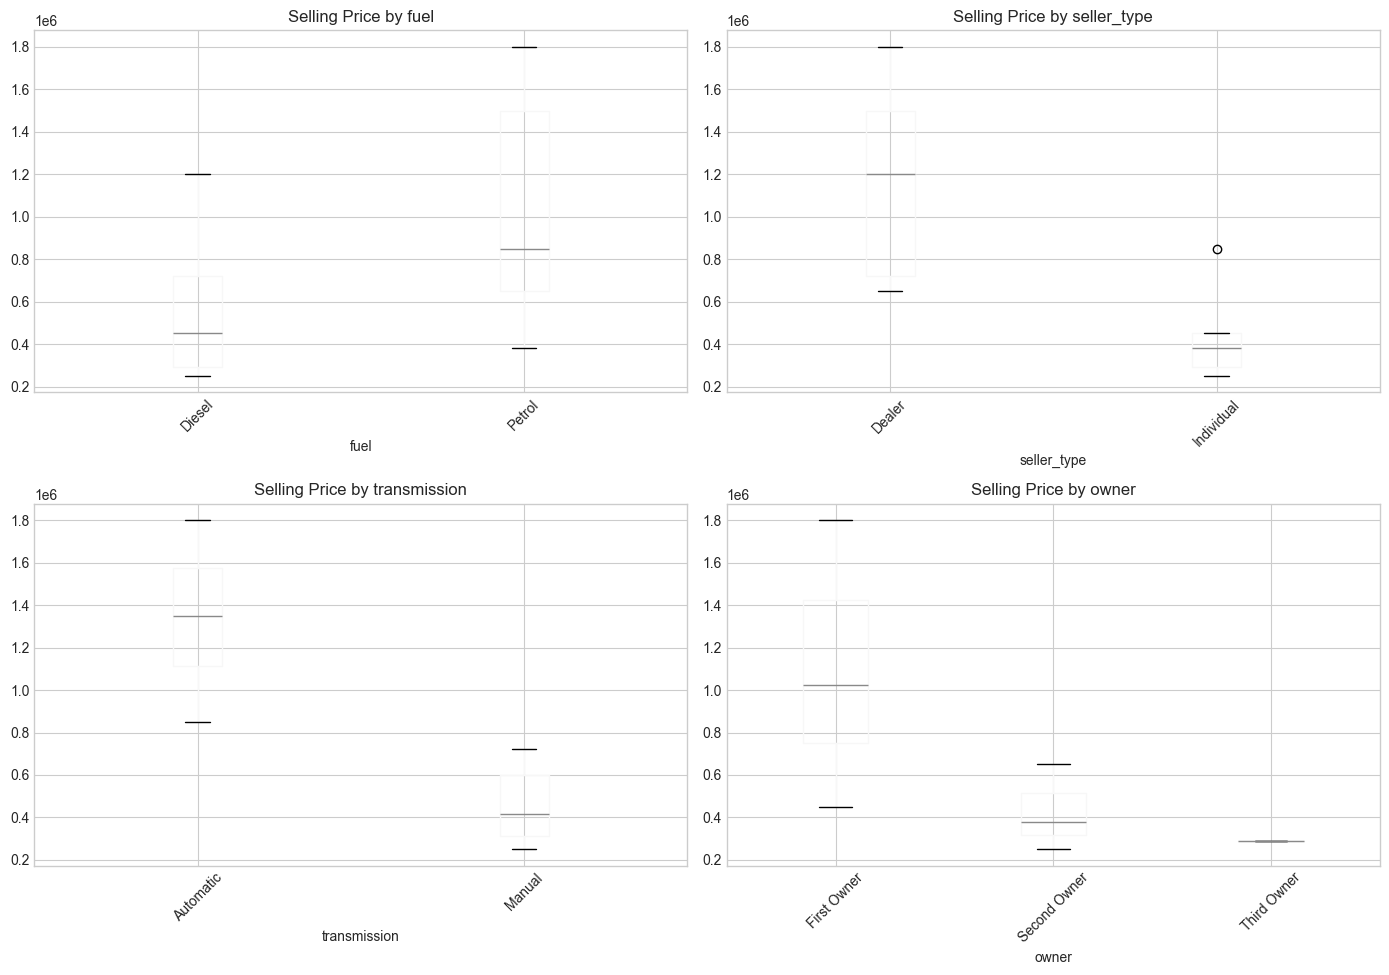

In [16]:
# Cell 16: Price by Categorical Features
# Selling price by categorical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols[:4]):
    df.boxplot(column='selling_price', by=col, ax=axes[idx])
    axes[idx].set_title(f'Selling Price by {col}')
    axes[idx].set_xlabel(col)
    axes[idx].tick_params(axis='x', rotation=45)

plt.suptitle('')
plt.tight_layout()
plt.show()

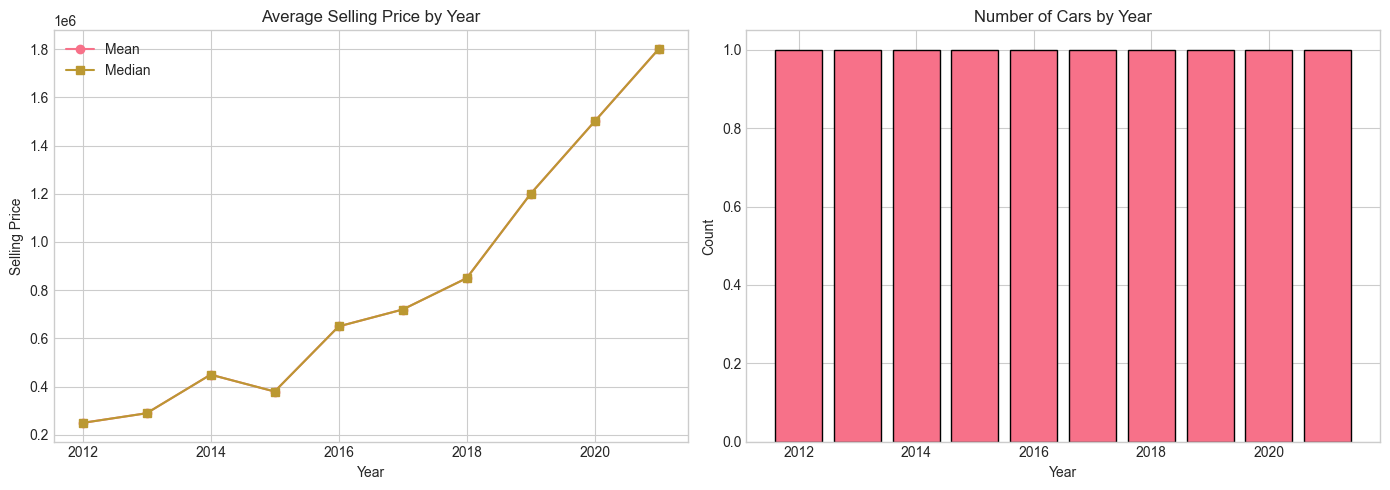

In [17]:
# Cell 17: Year Analysis
# Price by year
if 'year' in df.columns:
    year_stats = df.groupby('year')['selling_price'].agg(['mean', 'median', 'count'])
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].plot(year_stats.index, year_stats['mean'], marker='o', label='Mean')
    axes[0].plot(year_stats.index, year_stats['median'], marker='s', label='Median')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Selling Price')
    axes[0].set_title('Average Selling Price by Year')
    axes[0].legend()
    
    axes[1].bar(year_stats.index, year_stats['count'], edgecolor='black')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Count')
    axes[1].set_title('Number of Cars by Year')
    
    plt.tight_layout()
    plt.show()

In [18]:
# Cell 18: Summary
# Summary statistics
print("="*60)
print("DATA EXPLORATION SUMMARY")
print("="*60)
print(f"\nDataset Shape: {df.shape}")
print(f"Numerical Features: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"Categorical Features: {len(df.select_dtypes(include=['object']).columns)}")
print(f"Missing Values: {df.isnull().sum().sum()}")
print(f"\nTarget Variable (selling_price):")
print(f"  - Mean: {df['selling_price'].mean():,.2f}")
print(f"  - Median: {df['selling_price'].median():,.2f}")
print(f"  - Std: {df['selling_price'].std():,.2f}")
print(f"  - Range: {df['selling_price'].min():,.2f} - {df['selling_price'].max():,.2f}")

print("\n" + "="*60)
print("KEY INSIGHTS:")
print("="*60)
print("1. Check for skewness in target variable - may need log transformation")
print("2. Review correlation matrix for feature selection")
print("3. Handle missing values appropriately")
print("4. Consider encoding categorical variables")
print("5. Look for outliers in numerical features")

DATA EXPLORATION SUMMARY

Dataset Shape: (10, 11)
Numerical Features: 4
Categorical Features: 7
Missing Values: 0

Target Variable (selling_price):
  - Mean: 809,000.00
  - Median: 685,000.00
  - Std: 531,464.43
  - Range: 250,000.00 - 1,800,000.00

KEY INSIGHTS:
1. Check for skewness in target variable - may need log transformation
2. Review correlation matrix for feature selection
3. Handle missing values appropriately
4. Consider encoding categorical variables
5. Look for outliers in numerical features
